In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [2]:
#1A Read CarName file into df1
df1=pd.read_csv('Car name.csv',skipinitialspace=True)

In [3]:
#1B Read Car-Attributes file into df2
df2=pd.read_json('Car-Attributes.json')

In [4]:
df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [5]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
#1C Merged both dataframes
df=pd.concat([df1,df2],axis=1)

In [7]:

df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [8]:
# 1D 5 point summary.Summary of Numeric features
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
#2A Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach
df.isnull().sum(axis=0)/len(df.index)
#Has no direct nulls

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
# 2H unexpected value in df columns
#if we look at the df.info() hp field being numeric is considered as object which means it probably has 
# a non numeric unwanted value
df['hp'].unique()
#We can see ? in the data 

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [12]:
df[df['hp']=='?'].shape

(6, 9)

In [13]:
#For cars hp is a important variable and as the number of records with hp==? is only 6. hence we can drop them.
df=df[df['hp']!='?']

In [14]:
df['hp']=df['hp'].astype('float64')

<ipython-input-14-1b82decdb410>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hp']=df['hp'].astype('float64')


In [15]:
df['car_name'].value_counts()

ford pinto            5
toyota corolla        5
amc matador           5
amc hornet            4
chevrolet impala      4
                     ..
mazda rx-4            1
dodge d200            1
mercedes-benz 240d    1
ford granada          1
mercury zephyr        1
Name: car_name, Length: 301, dtype: int64

In [16]:
df[df['car_name']=='ford maverick'].groupby(['car_name','yr','origin','cyl']).mean()

mpg   disp    hp    wt   acc
car_name      yr origin cyl                               
ford maverick 70 1      6    21.0  200.0  85.0  2587  16.0
              73 1      6    18.0  250.0  88.0  3021  16.5
              75 1      6    15.0  250.0  72.0  3158  19.5
              76 1      6    24.0  200.0  81.0  3012  17.6

In [17]:
df[df['car_name']=='ford maverick']

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
17,ford maverick,21.0,6,200.0,85.0,2587,16.0,70,1
100,ford maverick,18.0,6,250.0,88.0,3021,16.5,73,1
155,ford maverick,15.0,6,250.0,72.0,3158,19.5,75,1
193,ford maverick,24.0,6,200.0,81.0,3012,17.6,76,1


In [18]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [19]:
# As per above analysis we can see that if we consider car_name, cyl,origin & yr as attributes (non measures) then we dont see any duplicates in data
#Also I will be concatenating car_name,cyl, yr into a single field to make each record unique

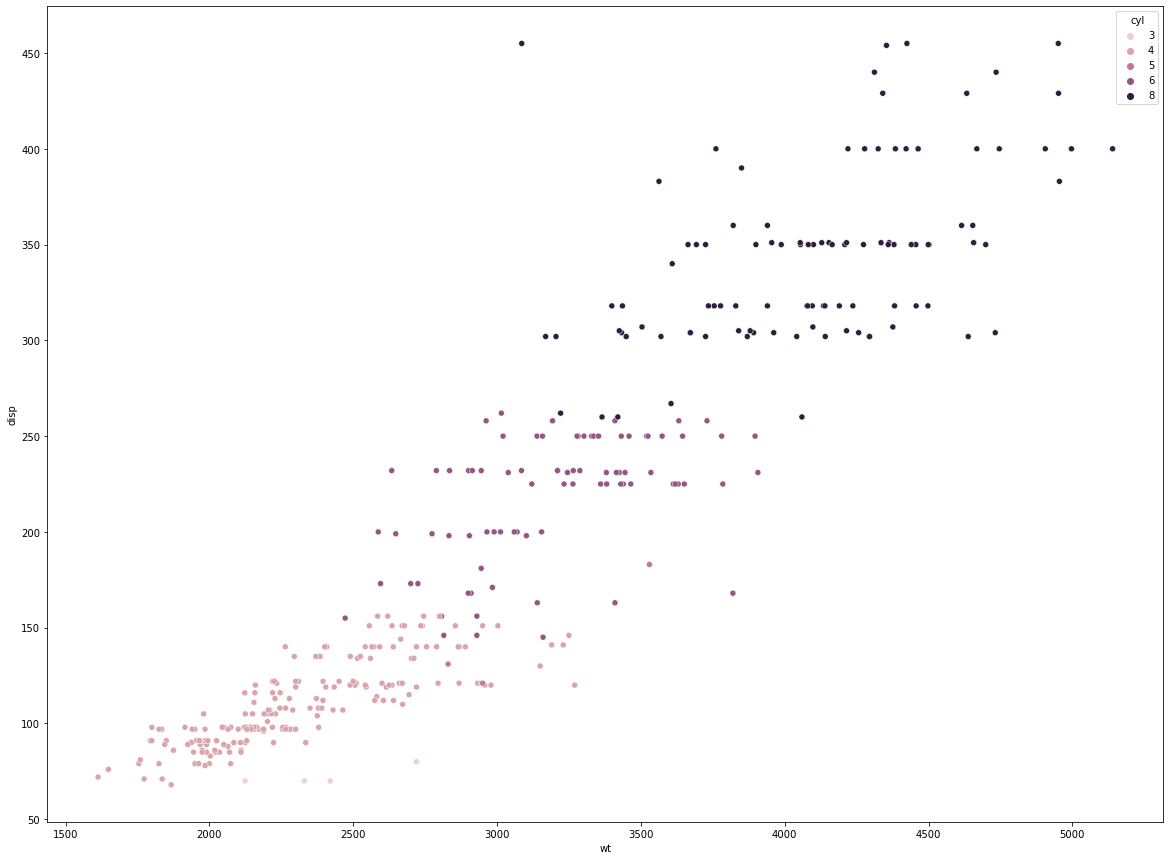

In [20]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='wt',y='disp',data=df,hue='cyl')
plt.show()
#2d As we can see higher the number of cylinders, higher the weight of the car and also the displacement is high.

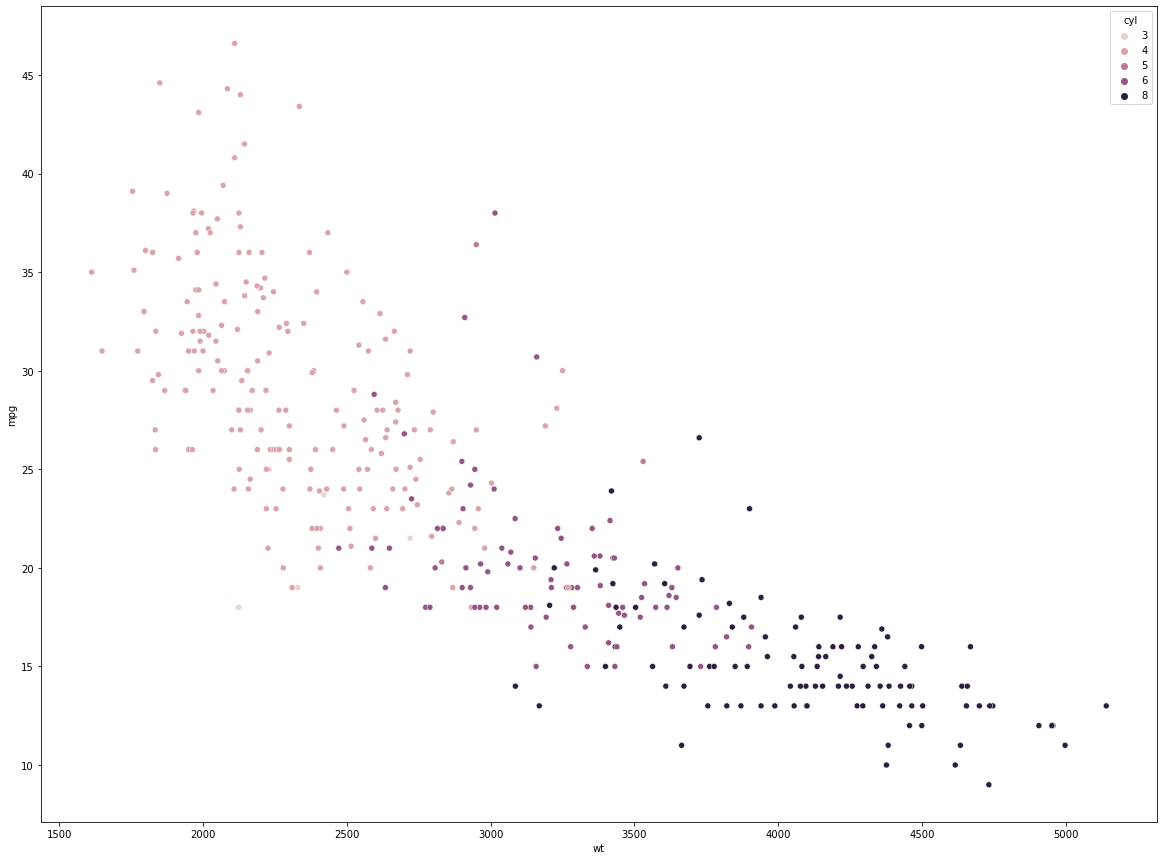

In [21]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='wt',y='mpg',data=df,hue='cyl')
plt.show()
# 2F
#Higher the cylinders more is the weight but mpg will be lesser. They are inversely related. As weight is more higher fuel is required to run the vehicle for the same distance hence mpg is lower.
#The same is displayed in the graph.

In [22]:
df['Car_unique']=df['car_name']+df['cyl'].astype('string')+df['yr'].astype('string')

<ipython-input-22-3451953f2fb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car_unique']=df['car_name']+df['cyl'].astype('string')+df['yr'].astype('string')


In [23]:
df=df.drop(['car_name','cyl','origin','yr'],axis=1)

In [24]:
df

,mpg,disp,hp,wt,acc,Car_unique
0,18.0,307.0,130.0,3504,12.0,chevrolet chevelle malibu870
1,15.0,350.0,165.0,3693,11.5,buick skylark 320870
2,18.0,318.0,150.0,3436,11.0,plymouth satellite870
3,16.0,304.0,150.0,3433,12.0,amc rebel sst870
4,17.0,302.0,140.0,3449,10.5,ford torino870
...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,ford mustang gl482
394,44.0,97.0,52.0,2130,24.6,vw pickup482
395,32.0,135.0,84.0,2295,11.6,dodge rampage482
396,28.0,120.0,79.0,2625,18.6,ford ranger482


In [25]:
#2B 
df.drop_duplicates()

,mpg,disp,hp,wt,acc,Car_unique
0,18.0,307.0,130.0,3504,12.0,chevrolet chevelle malibu870
1,15.0,350.0,165.0,3693,11.5,buick skylark 320870
2,18.0,318.0,150.0,3436,11.0,plymouth satellite870
3,16.0,304.0,150.0,3433,12.0,amc rebel sst870
4,17.0,302.0,140.0,3449,10.5,ford torino870
...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,ford mustang gl482
394,44.0,97.0,52.0,2130,24.6,vw pickup482
395,32.0,135.0,84.0,2295,11.6,dodge rampage482
396,28.0,120.0,79.0,2625,18.6,ford ranger482


In [26]:
#Above data has no duplicates

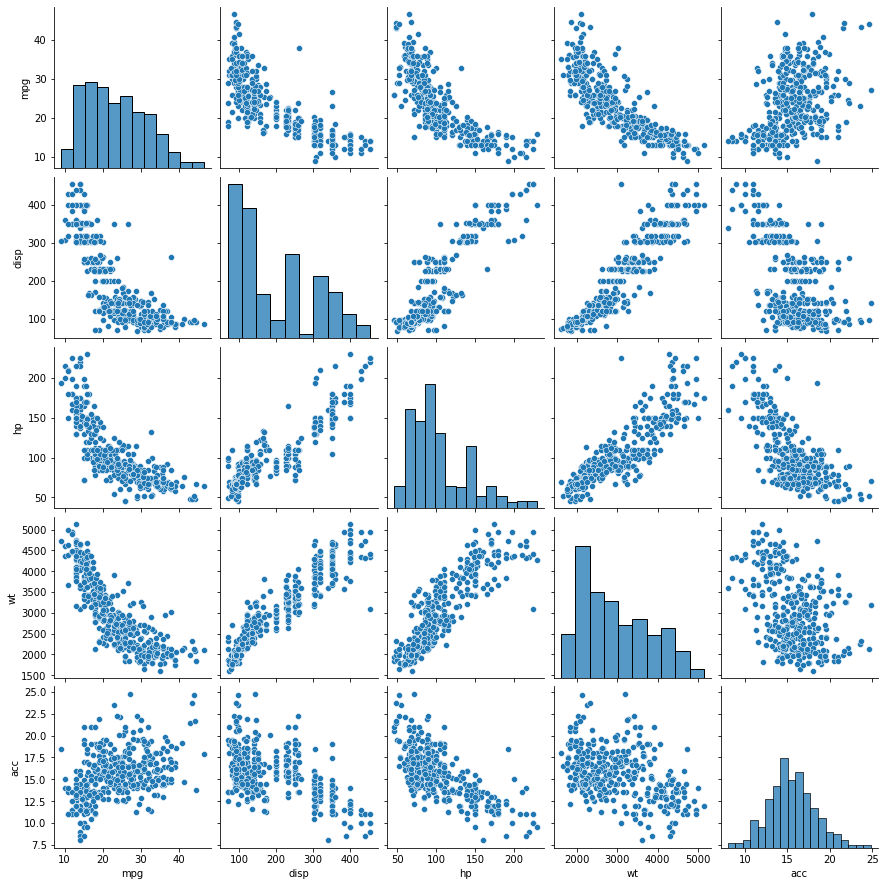

In [27]:
#2C Plot a pairplot for all features.
sns.pairplot(df)

#Observations:
mpg is inversely related to mpg & wt
wt is directly related to disp
wt of cars is higher for countries of origin 1

In [28]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [29]:
df_train,df_test=train_test_split(df,train_size=0.8,random_state=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'Inertia wrt no of clus')

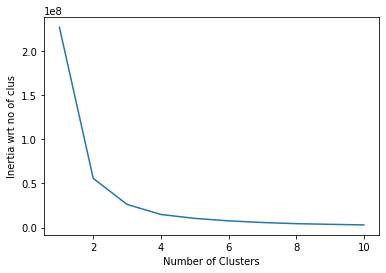

In [30]:
#3A & 3 B . Tried kmeans for upto 10 clusters and plotted 
num_of_clus=[1,2,3,4,5,6,7,8,9,10]
scores=[]
for i in num_of_clus:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_train.drop('Car_unique',axis=1))
    scores.append(kmeans.inertia_)

plt.plot(num_of_clus,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia wrt no of clus')

In [31]:
from kneed import knee_locator

In [32]:
kn=knee_locator.KneeLocator(x=num_of_clus,y=scores,curve='convex',direction='decreasing')

In [33]:
# 3 C Number of cluster: optimal value 
kn.knee

3

In [34]:
# 3 D 3is the optimum num of clusters. Will train model on 3 clusters

kmeans=KMeans(n_clusters=3)
kmeans.fit(df_train.drop('Car_unique',axis=1))

KMeans(n_clusters=3)

In [35]:
#3E Cluster is the label column I have added
df_train['Cluster']=kmeans.predict(df_train.drop('Car_unique',axis=1))

In [36]:
#3G passing test data points through the model and checking the cluster assignments
df_test['Cluster']=kmeans.predict(df_test.drop('Car_unique',axis=1))

In [37]:
df_train.head()

,mpg,disp,hp,wt,acc,Car_unique,Cluster
342,30.0,135.0,84.0,2385,12.9,plymouth reliant481,1
331,33.8,97.0,67.0,2145,18.0,subaru dl480,1
357,32.9,119.0,100.0,2615,14.8,datsun 200sx481,1
378,38.0,105.0,63.0,2125,14.7,plymouth horizon miser482,1
306,28.8,173.0,115.0,2595,11.3,chevrolet citation679,1


In [38]:
df_test.head()

,mpg,disp,hp,wt,acc,Car_unique,Cluster
125,20.0,198.0,95.0,3102,16.5,plymouth duster674,0
142,26.0,79.0,67.0,1963,15.5,volkswagen dasher474,1
278,31.5,89.0,71.0,1990,14.9,volkswagen scirocco478,1
254,20.2,200.0,85.0,2965,15.8,ford fairmont (auto)678,0
328,30.0,146.0,67.0,3250,21.8,mercedes-benz 240d480,0


In [39]:
#Assignment B

In [40]:
data=pd.read_csv('vehicle.csv')

In [41]:
#1A read the dataframe
data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [43]:
data.isnull().sum(axis=0)*100/len(data.index)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [44]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_data=pd.DataFrame(data=imputer.fit_transform(data.drop('class',axis=1)),columns=data.drop('class',axis=1).columns)

In [45]:
df_data.isnull().sum(axis=0)*100 /len(data.index)

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
dtype: float64

In [46]:
#1B
df_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0


([<matplotlib.patches.Wedge at 0x1dda70e6760>,
 [Text(-0.02450677950444812, 1.0997269741887394, 'car'),
  Text(-0.7225894398582384, -0.82937597108028, 'bus'),
  Text(0.8130715899221039, -0.7408877038131637, 'van')],
 [Text(-0.01336733427515352, 0.5998510768302214, '50.71'),
  Text(-0.39413969446813, -0.4523868933165163, '25.77'),
  Text(0.4434935945029657, -0.4041205657162711, '23.52')])

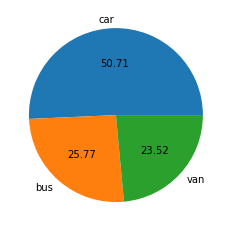

In [47]:
#1C
plt.pie(data['class'].value_counts(),labels=data['class'].value_counts().index,autopct='%.2f')

In [48]:
data['class'].value_counts().index

Index(['car', 'bus', 'van'], dtype='object')

In [49]:
df_data[df_data.duplicated()!=False]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio


In [50]:
df_data.shape

(846, 18)

In [51]:
df_data.drop_duplicates()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


In [52]:
#1 D  Above steps show no duplicates

In [53]:
#Data preparation

In [54]:
#2A Train-Test-split
X=df_data
y=data['class']

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=100)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [57]:
#Lets train a model using SVM
from sklearn.svm import SVC
model_svm=SVC()

In [58]:
model_svm.fit(X_train_scaled,y_train)

SVC()

In [59]:
model_svm.score(X_train_scaled,y_train)

0.9792899408284024

In [60]:
#Confusion matrix without PCA
y_test_pred=model_svm.predict(X_test_scaled)
print(confusion_matrix(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred,average='weighted'))

[[47  0  1]
 [ 2 77  1]
 [ 0  2 40]]
0.9647970580637318


In [61]:
model_svm.score(X_test_scaled,y_test)

0.9647058823529412

In [62]:
#Above is the accuracy without using PCA

In [63]:
#Lets Use PCA now

In [64]:
#I am taking all the componenets instead of 10
from sklearn.decomposition import PCA
pca=PCA()

In [65]:
pca.fit(X_train_scaled,y_train)

PCA()

In [66]:
pca.explained_variance_ratio_

array([5.20365143e-01, 1.64234313e-01, 1.12743085e-01, 6.40393866e-02,
       5.29931402e-02, 2.88237716e-02, 1.93642294e-02, 1.25656248e-02,
       8.61418338e-03, 5.20035275e-03, 3.50097313e-03, 2.47018602e-03,
       1.86253724e-03, 1.24285131e-03, 8.82635125e-04, 7.25666005e-04,
       3.50575481e-04, 2.13458430e-05])

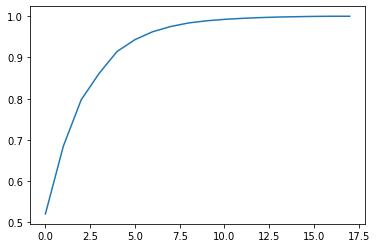

In [67]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [68]:
#Around 8 components can explain 90 % of the variance

In [69]:
pca=PCA(n_components=8)
X_train_scaled_pca=pd.DataFrame(pca.fit_transform(X_train_scaled),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
X_test_scaled_pca=pd.DataFrame(pca.transform(X_test_scaled),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])


In [70]:
svc1=SVC()
svc1.fit(X_train_scaled_pca,y_train)
svc1.score(X_train_scaled_pca,y_train)

0.977810650887574

In [71]:
svc1.score(X_test_scaled_pca,y_test)

0.9176470588235294

In [1]:
params={'C':[0.5,0.7,1.0,1.1,1.5,2],
    'kernel':['rbf','linear', 'poly','sigmoid'],
  'class_weight':[{'car': w,'van':2*w+1,'bus':2*w+1} for w in [1, 2, 4, 6, 10]]}
#{'car':[2,4,6,8],'van':[5,9,13,17],'bus':[5,9,13,17]}
model=SVC()
from sklearn.model_selection import GridSearchCV

model_cv=GridSearchCV(estimator=model,param_grid=params,cv=10,n_jobs=-1)
model_cv.fit(X_train_scaled_pca,y_train)

NameError: name 'SVC' is not defined

In [ ]:
model_cv.

In [73]:
best_model=model_cv.best_estimator_.fit(X_train_scaled_pca,y_train)
best_model.score(X_train_scaled_pca,y_train)

0.985207100591716

In [74]:
best_model.score(X_test_scaled_pca,y_test)

0.9294117647058824

In [75]:
best_model

SVC(C=0.5, class_weight={'bus': 21, 'car': 10, 'van': 21})

In [78]:
#Confusion Matrix with PCa
y_test_pred_pca=best_model.predict(X_test_scaled_pca)
print(confusion_matrix(y_test,y_test_pred_pca))
print('Precision score = ',precision_score(y_test,y_test_pred_pca,average='weighted'))
print('Accuracy score = ',accuracy_score(y_test,y_test_pred_pca))

[[47  0  1]
 [ 5 71  4]
 [ 0  2 40]]
Precision score =  0.9325068699766526
Accuracy score =  0.9294117647058824


In [79]:
#Confusion matrix without PCA
y_test_pred=model_svm.predict(X_test_scaled)
print(confusion_matrix(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred,average='weighted'))
print('Accuracy score = ',accuracy_score(y_test,y_test_pred))

[[47  0  1]
 [ 2 77  1]
 [ 0  2 40]]
0.9647970580637318
Accuracy score =  0.9647058823529412


# As we can see that the scores are better without PCA but the difference is small. Also what is important here is that we are getting a higher score with less number of features . This allows us to optimize the code performance with less impact on the metrics.

In [80]:
X_train.shape

(676, 18)

In [82]:
X_train_scaled_pca.shape

(676, 8)

In [ ]:
#Ans 5 A
PCA Assumes there must be linearity in the features of the dataset.
Axes with high variance would turn into principal components rest are considered as noise


In [ ]:
#Ans 5 B
PCA has major advantage of dimensionality reduction which can give us comparable results with less number of features compared to the total.


In [14]:
#Loops
i=1
j=10

while i<=j:
    
    if i%4 == c0:
        break
    print(i)

    
    
    i=i+1
    

1
2
3


In [17]:
#Loops
i=1
j=10

while i<=j:
    i=i+1
    if i%4 == 0:
        continue
    print(i)

    
    
    

2
3
5
6
7
9
10
11


In [25]:

while True:
    s=int(input('Enter a number'))
    if s==10:
        break

Enter a number4
Enter a number10
